![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Text Recognition - Problem Statement

For the Text Recognition problem, the input is an image while the output is a text as shown below.

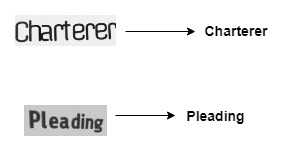

In [ ]:
# Text Recognition - Problem Statement

from IPython import display
display.Image("data/images/CV_A2_Intro_to_OCR-17.jpg")

So, in order to solve the Text Recognition problem, we need to develop a model that takes the image as an input and outputs the recognized text. Convolutional Neural Networks (CNNs) are good in handling image data, while for the sequence data such as text, Recurrent Neural Networks (RNNs) are preferred.

So, for the Text Recognition problem, an obvious choice would be to use a combination of Convolutional Neural Network and Recurrent Neural Network. [Convolutional Recurrent Neural Network (CRNN)](https://arxiv.org/pdf/1507.05717) is one such architecture that combines the CNN and RNN together.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. CRNN Architecture

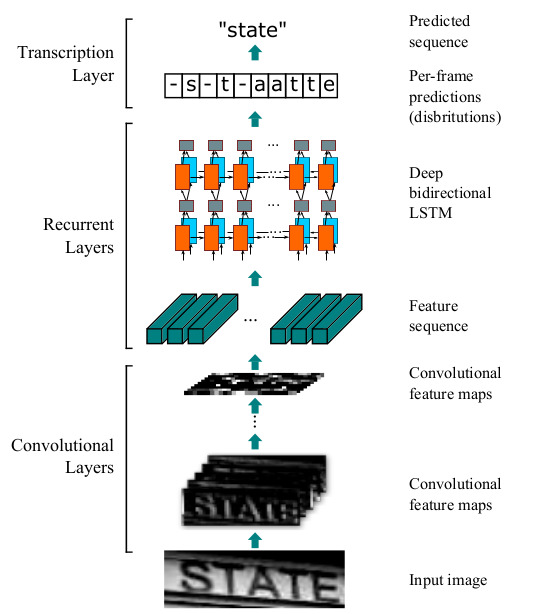

In [ ]:
# CRNN Architecture

from IPython import display
display.Image("data/images/CV_A3_Intro_to_CRNNs-01.jpg")

The network architecture of CRNN, as shown in above figure, consists of three components, including the convolutional layers, the recurrent layers, and a transcription layer, from bottom to top.

At the bottom of CRNN, the convolutional layers automatically extract a feature sequence from each input image. On top of the convolutional network, a recurrent network (a Deep bidirectional LSTM) is built for making prediction for each frame of the feature sequence, outputted by the convolutional layers. The recurrent network provides a sequence, identifying the relationship between the characters. The transcription layer at the top of CRNN is adopted to translate the per-frame predictions by the recurrent layers into a label sequence. It takes the character sequence, including redundant characters, and uses a probabilistic approach to clean the output. Though CRNN is composed of different kinds of network architectures (eg. CNN and RNN), it can be jointly trained with one loss function.

## 1. Feature Sequence Extraction

In this, first, the input image is fed through a number of convolutional layers to extract the feature maps. These feature maps are then divided into a sequence of feature vectors as shown by the blue color. These are obtained by dividing the feature maps into columns of single-pixel width. Now, a question might come to your mind that why are we dividing the feature maps by columns. The answer to this question lies in the Receptive Field concept. The **Receptive Field** is defined as the region in the input image that a particular CNN's feature map is looking at. For instance, for the above input image, the receptive field of each feature vector corresponds to a rectangular region in the input image as shown below.

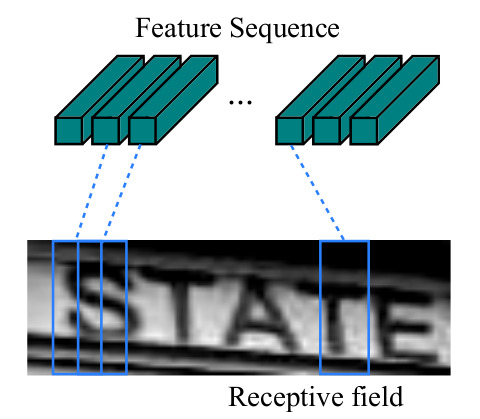

In [1]:
# Receptive Field

from IPython import display
display.Image("data/images/CV_A3_Intro_to_CRNNs-02.jpg")

And each of these rectangular regions is ordered from left to right. Thus, each feature vector can be considered as the image descriptor of that rectangular region.

## 2. Sequence Labeling

The feature vectors are fed to a bi-directional LSTM. Because of the softmax activation function, this LSTM layer outputs the probability distribution at each time step over the character set. To obtain the per-timestep output, we can either take the max of the probability distribution at each time step or apply any other method.

But these feature vectors sometimes may not contain the complete character. For instance, see the below image where the 2 feature vectors marked by red color contains some part of the character “S”.

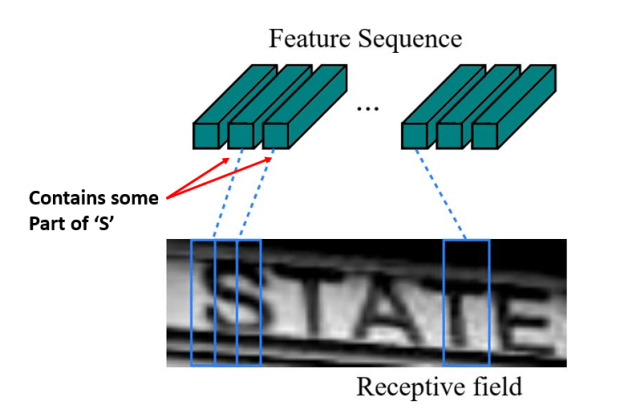

In [2]:
# Partial characters in the Receptive Field

from IPython import display
display.Image("data/images/CV_A3_Intro_to_CRNNs-03.jpg")

Thus, in the LSTM output, we may get repeated characters as shown below by the red box. We call these per-frame or per-timestep predictions.

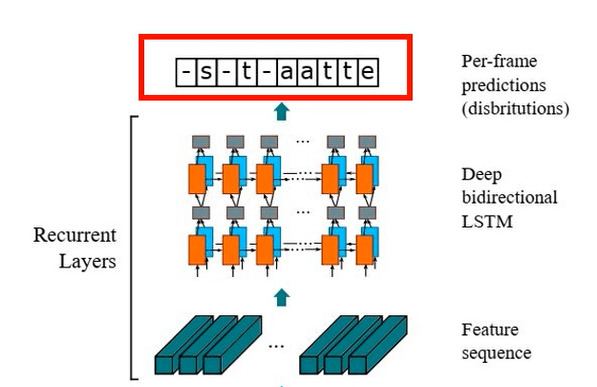

In [3]:
# Repeated characters in LSTM output

from IPython import display
display.Image("data/images/CV_A3_Intro_to_CRNNs-04.jpg")

## 3. Transcription

Transcription is the process of converting the per-frame predictions made by RNN into a label sequence. Mathematically, transcription is to find the label sequence with the highest probability conditioned on the per-frame predictions.

Now, here comes the problem. As we have already discussed, that for the text recognition, the training data consists of images and the corresponding text as shown below.

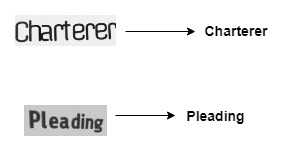

In [4]:
# Training Data for Text Recognition

from IPython import display
display.Image("data/images/CV_A2_Intro_to_OCR-17.jpg")

Thus, we only know the final output and we don't know the per-timestep predictions. Now, in order to train this network, we either need to know the per-timestep output for each input image or we need to develop a mechanism to convert either per-timestep output to final output or vice-versa.

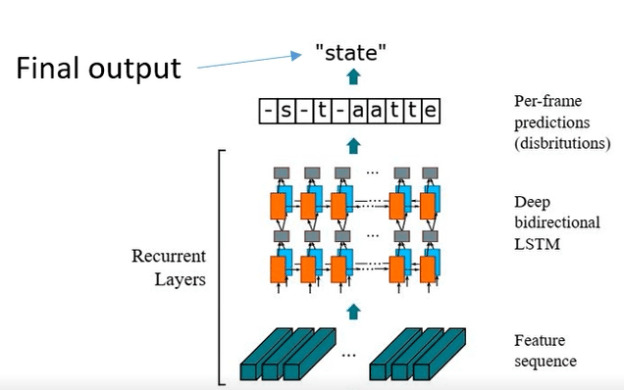

In [5]:
# Per-timestep output to final output

from IPython import display
display.Image("data/images/CV_A3_Intro_to_CRNNs-05.jpg")

So, the problem is how to align the final output with the per-timestep predictions in order to train this network.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)